In [2]:
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
os.chdir("C:/Users\Jorge\Desktop\sgem datos")

In [96]:
df=pd.read_csv('mitch-4.csv')
df=df.drop("Unnamed: 0",axis=1)
df=df.drop("Z",axis=1)
#df.head(n=13)
df.head()

,X,Y,Copper,Moly
0,36226.0,27295.1,0.03,0.007
1,36226.0,27295.1,0.33,0.005
2,36226.0,27295.1,0.21,0.019
3,36226.0,27295.1,0.02,0.016
4,36226.0,27295.1,0.09,0.005


In [97]:
df.describe()

,X,Y,Copper,Moly
count,7724.000000,7724.000000,7724.000000,7724.000000
mean,35264.109037,28151.228314,0.305647,0.015407
std,508.066437,304.628570,0.286037,0.037776
min,33260.300000,27041.900000,0.020000,0.002000
25%,34849.600000,27958.600000,0.110000,0.003000
50%,35337.100000,28159.300000,0.230000,0.006000
75%,35695.600000,28439.600000,0.410000,0.016000
max,38348.800000,29115.000000,4.320000,1.499000


In [98]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,7724.0,35264.109037,508.066437,33260.300,34849.600,35337.100,35695.600,38348.800
Y,7724.0,28151.228314,304.628570,27041.900,27958.600,28159.300,28439.600,29115.000
Copper,7724.0,0.305647,0.286037,0.020,0.110,0.230,0.410,4.320
Moly,7724.0,0.015407,0.037776,0.002,0.003,0.006,0.016,1.499


In [99]:
Xmin=33000;Xmax=39000
Ymin=26500;Ymax=29500
Coppermin=0.00;Coppermax=0.25
cmap=plt.cm.plasma
GSLIB.locmap

<function geostatspy.GSLIB.locmap(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap, fig_name)>

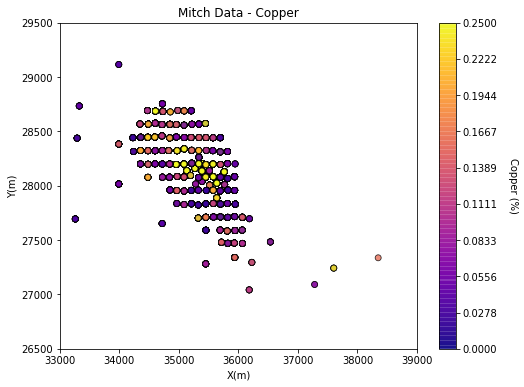

In [100]:
GSLIB.locmap(df,'X','Y','Copper',Xmin,Xmax,Ymin,Ymax,Coppermin,Coppermax,'Mitch Data - Copper','X(m)','Y(m)',
             'Copper (%)',cmap,'locmap_Copper')

In [101]:
geostats.declus

<function geostatspy.geostats.declus(df, xcol, ycol, vcol, iminmax, noff, ncell, cmin, cmax)>

In [102]:
wts,cell_sizes,dmeans=geostats.declus(df,'X','Y','Copper',iminmax=1,noff=10,ncell=100,cmin=10,cmax=20000)
df['Wts']=wts
df.head()

There are 7724 data with:
   mean of      0.30564733282496115 
   min and max  0.02 and 4.3200002
   standard dev 0.2860185505823003 


,X,Y,Copper,Moly,Wts
0,36226.0,27295.1,0.03,0.007,11.698838
1,36226.0,27295.1,0.33,0.005,11.698838
2,36226.0,27295.1,0.21,0.019,11.698838
3,36226.0,27295.1,0.02,0.016,11.698838
4,36226.0,27295.1,0.09,0.005,11.698838


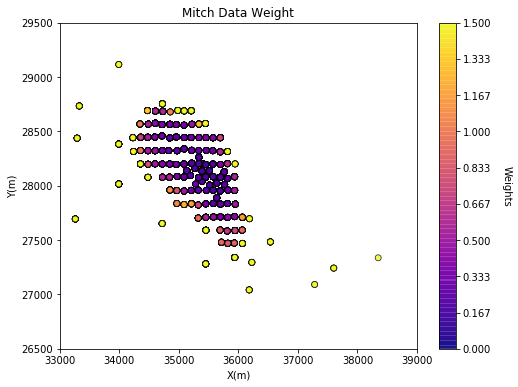

In [106]:
GSLIB.locmap(df,'X','Y','Wts',Xmin,Xmax,Ymin,Ymax,0.0,1.5,'Mitch Data Weight','X(m)','Y(m)','Weights',cmap,'locmap_Weights')

Copper naive mean is 0.306.
Copper declustered mean is 0.178.
Correction of 0.4182.
Summary statistics of the declustering weights:
DescribeResult(nobs=7724, minmax=(0.18191655223590827, 406.5414988451325), mean=0.9999999999999533, variance=45.43112957558048, skewness=36.405401456054705, kurtosis=1861.325232814859)


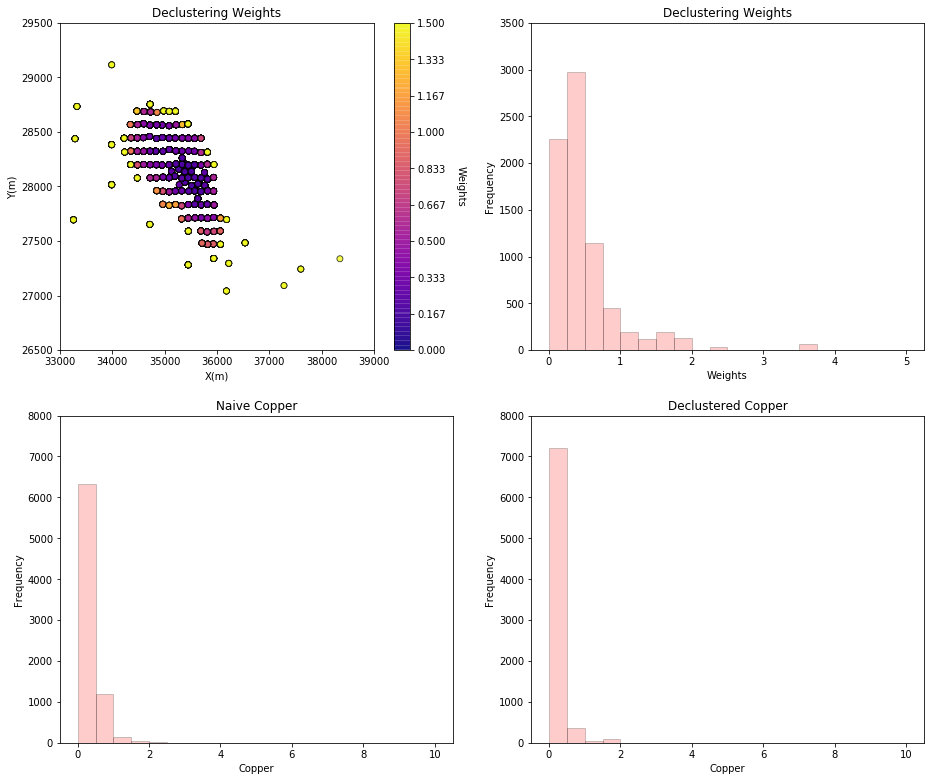

In [119]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Wts',Xmin,Xmax,Ymin,Ymax,0,1.5,'Declustering Weights','X(m)','Y(m)','Weights',cmap)

plt.subplot(222)
GSLIB.hist_st(df['Wts'],0,5,log=False,cumul=False,bins=20,weights=None,xlabel="Weights",title="Declustering Weights")
plt.ylim(0,3500)

plt.subplot(223)
GSLIB.hist_st(df['Copper'],0,10,log=False,cumul=False,bins=20,weights=None,xlabel="Copper",title="Naive Copper")
plt.ylim(0,8000)

plt.subplot(224)
GSLIB.hist_st(df['Copper'],0,10,log=False,cumul=False,bins=20,weights=df['Wts'],xlabel="Copper",
              title="Declustered Copper")
plt.ylim(0,8000)

por_mean=np.average(df['Copper'].values)
por_dmean=np.average(df['Copper'].values,weights=df['Wts'].values)

print('Copper naive mean is '+str(round(por_mean,3))+'.')
print('Copper declustered mean is '+str(round(por_dmean,3))+'.')
cor=(por_mean-por_dmean)/por_mean
print('Correction of '+str(round(cor,4))+'.')

print('Summary statistics of the declustering weights:')
print(stats.describe(wts))

plt.subplots_adjust(left=0,bottom=0,right=2,top=2.5,wspace=0.2,hspace=0.2)
plt.show()

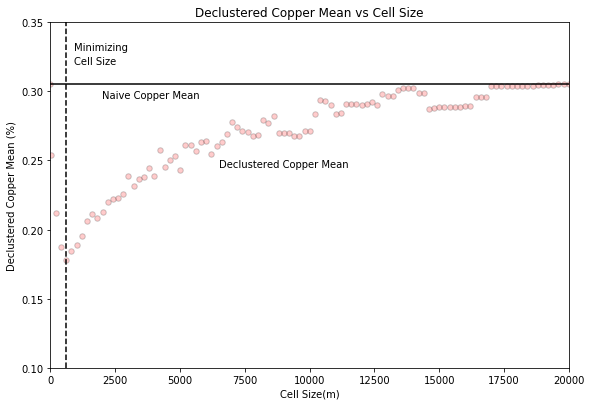

In [122]:
plt.subplot(111)
plt.scatter(cell_sizes,dmeans,s=30,alpha=0.2,edgecolors="black",facecolors='red')   #modula el color de los círculos rosados en la gráfica
plt.xlabel('Cell Size(m)')
plt.ylabel('Declustered Copper Mean (%)')
plt.title('Declustered Copper Mean vs Cell Size')
plt.plot([0,20000],[por_mean,por_mean],color='black')
plt.plot([600,600],[0.1,0.35],color='black',linestyle='dashed')
plt.text(2000,0.295,r'Naive Copper Mean')   #solo es un texto a la altura del punto indicado
plt.text(6500,0.245,r'Declustered Copper Mean')   #solo es un texto a la altura del punto indicado
plt.text(900,0.33,r'Minimizing')   #solo es un texto a la altura del punto indicado
plt.text(900,0.32,r'Cell Size')   #solo es un texto a la altura del punto indicado
plt.ylim(0.10,0.35)
plt.xlim(0,20000)
plt.subplots_adjust(left=0,bottom=0,right=1.2,top=1.2,wspace=0.2,hspace=0.2)   #Acomoda la imagen
plt.show()